# **Logistic Regression Model**

## We're using annual survey data from the CDC to predict risk for mental health problems. These are self-report measures. There are a number of features that we will use in order to predict whether or not someone will experience mental health problems over a particular month-long period. 

## Install libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

## Read in the data

In [3]:
pd.set_option('display.max_columns', 50)
LLCP2 = pd.read_csv(r'C:\Users\Nick\Desktop\GitProjects\LLCP_Project\LLCP2.csv')
LLCP2.head()

,SEX,_AGE_G,_BMI5CAT,_EDUCAG,_INCOMG,_DRNKWEK,_RFDRHV5,_PACAT1,PA1MIN_,EXERANY2,_RFHLTH,_VEGESU1,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
0,0.0,6.0,1.0,1.0,4.0,5.397605e-79,0.0,1.0,360.0,1.0,1.0,171.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,6.0,1.0,1.0,5.0,5.397605e-79,0.0,1.0,420.0,1.0,1.0,200.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,6.0,1.0,0.0,4.0,1.000000e+02,0.0,4.0,270.0,0.0,1.0,57.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,6.0,1.0,0.0,1.0,5.397605e-79,0.0,2.0,270.0,1.0,0.0,172.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,6.0,0.0,0.0,1.0,5.397605e-79,0.0,4.0,270.0,0.0,0.0,48.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0,0.0


## Let's run a full logistic regression model first

In [4]:
X1 = LLCP2[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_DRNKWEK','_RFDRHV5','_PACAT1','PA1MIN_','EXERANY2',
           '_RFHLTH','_VEGESU1','_HCVU651','EMPLOY1','VETERAN3','MARITAL','ADDEPEV2','POORHLTH',
           'PHYSHLTH']].values

y_logistic1 = LLCP2['MENTHLTH2'].values

In [5]:
logit_model=sm.Logit(y_logistic1,X1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.509510
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.184      
Dependent Variable: y                AIC:              458613.0359
Date:               2019-09-05 11:26 BIC:              458822.3596
No. Observations:   450016           Log-Likelihood:   -2.2929e+05
Df Model:           18               LL-Null:          -2.8109e+05
Df Residuals:       449997           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1       -0.3653     0.0081    -44.9471   0.0000   -0.3813   -0.3494
x2       -0.2857     0.0025   -112.9531   0.0

#### We can see that all variables have p<.05 except for 'x13' (__HCVU651_), so I'll try dropping that from the model first

# Model fitting

## Create two df's: X = features - target; y = only target

## Then do the test/train split and fit the model

In [6]:
X = LLCP2[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_DRNKWEK','_RFDRHV5','_PACAT1','EXERANY2',
           '_RFHLTH','EMPLOY1','VETERAN3','MARITAL','ADDEPEV2','POORHLTH',
           'PHYSHLTH']].values

y_logistic = LLCP2['MENTHLTH2'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y_logistic, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
probs = logreg.predict_proba(X_test)
probs = probs[:,1]

## Predicting the test set results and calculating the accuracy

In [13]:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.7619


## Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[84345  7945]
 [24205 18510]]


### The result is telling us that we have 84345+18510 correct predictions and 24205+7945 incorrect predictions. The risk of Type 2 error (bottom left) seems a bit larger than type 1 error (top right).

#### True positive:     84345     _(We predicted a positive result and it was positive)_
#### True negative:    18510     _(We predicted a negative result and it was negative)_
#### False positive:    7945       _(We predicted a positive result and it was negative)_
#### False negative:   24205     _(We predicted a negative result and it was positive)_

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84     92290
         1.0       0.70      0.43      0.54     42715

   micro avg       0.76      0.76      0.76    135005
   macro avg       0.74      0.67      0.69    135005
weighted avg       0.75      0.76      0.74    135005



### You can see above that the accuracy metrics look pretty good, at least for the 'Good Mental Health' ('0') value of the MENTHLTH target. The scores for the 'Poor Mental Health' value of '1' are much lower. This can be explained by the unbalanced nature of the data. 

#### If you recall from the previous 'Exploratory Analysis' file, the value count for MENTHLTH2 is unbalanced. There are roughly 300,000 rows with a '0' and about 150,000 with a '1'. Since the '0' indicates 'Good Mental Health' and has far more rows, it makes sense that the model predicts 'Good Mental Health' more accurately then 'Poor Mental Health'. 

#### There are ways of balancing the data, which we'll do below...

## Receiver Operating Characteristic (ROC) Curve

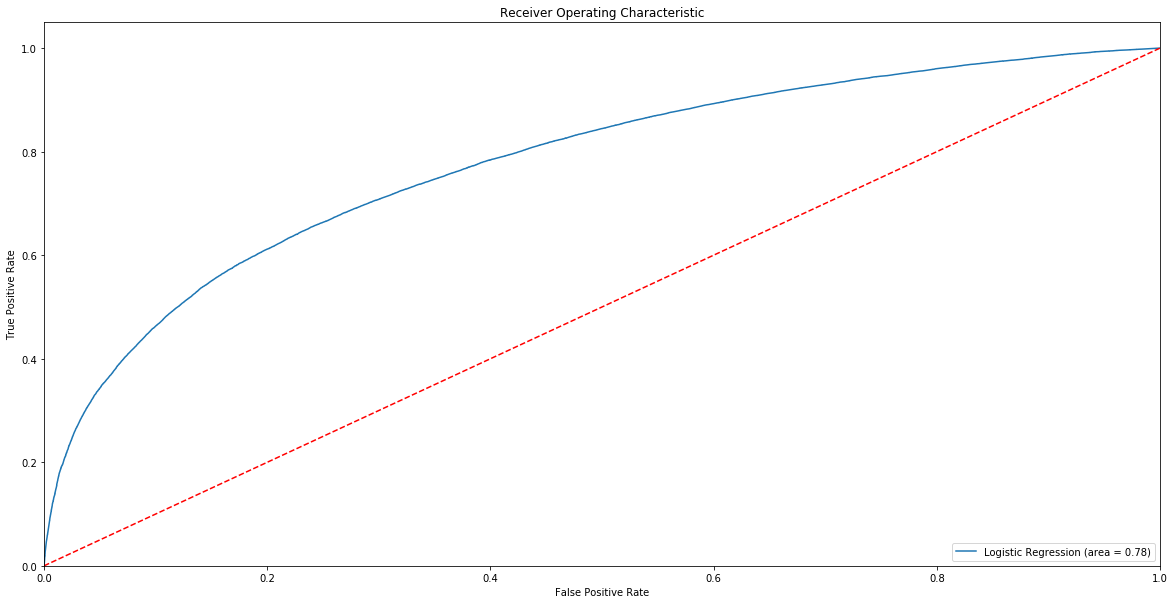

AUC: 0.778


In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('AUC: %.3f' % logit_roc_auc)

#### The receiver operating characteristic (ROC) curve is tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# Dealing with unbalanced data:

## The data is unbalanced, indicted by three things: 

### (1) MENTHLTH2 value counts show twice as many '0' than '1' rows
### (2) The accuracy scores for the '1' values are far lower than the '0', showing the model is good at predicting 'Good Mental Health', but not 'Poor Mental Health'.
### (3) During model building, the accuracy score did not change much with the addition/sutraction of features

### There are various re-sampling methods for dealing with unbalanced data. We will utilize the 'Under-sampling' technique. This technique drops rows at random from the 'majority class', or the over-represented value. In this case, the '0' rows will be dropped at random until both value's are equal. This can lead to a loss of information, if there is not enough data. Since we have almost 500,000 total rows, this should not be a significant problem. 

## First, re-check value counts for the target...you can see twice as many '0' values

0.0    307337
1.0    142679
Name: MENTHLTH2, dtype: int64

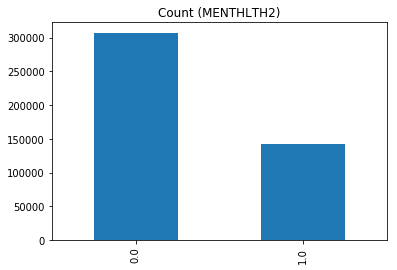

In [19]:
LLCP2.MENTHLTH2.value_counts().plot(kind='bar', title='Count (MENTHLTH2)');
LLCP2['MENTHLTH2'].value_counts()

## Now, we want to divide the target by value

In [20]:
# Class count
count_class_0, count_class_1 = LLCP2.MENTHLTH2.value_counts()

# Divide by class
Good_MH = LLCP2[LLCP2['MENTHLTH2'] == 0]
Poor_MH = LLCP2[LLCP2['MENTHLTH2'] == 1]

## Now we undersample and concatenate back together. Then re-check to value counts. They are equal now, and we still have 142,679 rows to work with. 

Random under-sampling:
1.0    142679
0.0    142679
Name: MENTHLTH2, dtype: int64


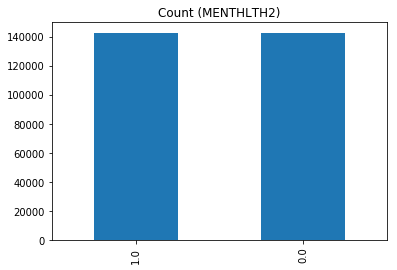

In [21]:
Good_MH_under = Good_MH.sample(count_class_1)
LLCP2_under = pd.concat([Good_MH_under, Poor_MH], axis=0)

print('Random under-sampling:')
print(LLCP2_under.MENTHLTH2.value_counts())

LLCP2_under.MENTHLTH2.value_counts().plot(kind='bar', title='Count (MENTHLTH2)');

In [22]:
LLCP2_under.head()

,SEX,_AGE_G,_BMI5CAT,_EDUCAG,_INCOMG,_DRNKWEK,_RFDRHV5,_PACAT1,PA1MIN_,EXERANY2,_RFHLTH,_VEGESU1,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
265697,0.0,5.0,1.0,0.0,4.0,5.397605e-79,0.0,4.0,270.0,0.0,0.0,160.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448607,0.0,5.0,1.0,0.0,1.0,5.397605e-79,0.0,4.0,270.0,0.0,0.0,175.0,0.0,0.0,0.0,1.0,0.0,10.0,15.0,0.0,0.0
206241,1.0,6.0,1.0,1.0,5.0,7.000000e+01,0.0,1.0,1020.0,1.0,1.0,158.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
136803,0.0,6.0,1.0,0.0,2.0,5.397605e-79,0.0,4.0,270.0,0.0,1.0,200.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
75953,1.0,4.0,1.0,0.0,3.0,5.397605e-79,0.0,2.0,270.0,1.0,1.0,101.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Now let's use the new df (LLCP2_under) to model build, as before.

In [23]:
#Full Model before backward elimination
#X2 = LLCP2_under[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_DRNKWEK','_RFDRHV5','_PACAT1','PA1MIN_',
                 #'EXERANY2','_RFHLTH','_VEGESU1','_HCVU651','EMPLOY1','VETERAN3','MARITAL','ADDEPEV2',
                 #'POORHLTH','PHYSHLTH']].values
        

#FINAL model after backward elim: dropped '_INCOMG','_PACAT1','PA1MIN_','EXERANY2','_VEGESU1', and '_HCVU651'
X2 = LLCP2_under[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_DRNKWEK','_RFDRHV5','EXERANY2','_RFHLTH','EMPLOY1',
                  'VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH']].values

y_logistic2 = LLCP2_under['MENTHLTH2'].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X2, y_logistic2, test_size=0.3, random_state=0)
logreg2 = LogisticRegression(solver='liblinear')
logreg2.fit(X_train, y_train)
y_pred = logreg2.predict(X_test)
probs = logreg2.predict_proba(X_test)
probs = probs[:,1]

## Model accuracy

### We see the model accuracy score dropped a little bit, but it's still decent. Let's look closer.

In [25]:
y_pred = logreg2.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg2.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.7043


## Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[33048  9657]
 [15654 27249]]


#### True positive:    33048     _(We predicted a positive result and it was positive)_
#### True negative:    27249     _(We predicted a negative result and it was negative)_
#### False positive:   9657      _(We predicted a positive result and it was negative)_
#### False negative:   15654     _(We predicted a negative result and it was positive)_

#### So, this model makes more correct predictions, than not and the false negative rate seems a bit higher than the false positive

## Check the precision, recall, and F1 scores

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[33048  9657]
 [15654 27249]]
              precision    recall  f1-score   support

         0.0       0.68      0.77      0.72     42705
         1.0       0.74      0.64      0.68     42903

   micro avg       0.70      0.70      0.70     85608
   macro avg       0.71      0.70      0.70     85608
weighted avg       0.71      0.70      0.70     85608

0.7043383795906925


### Above, we that our metrics have been lowered a bit after undersampling, however, the scores for 'poor mental health'  ('0) have been raised and are similar to 'good mental heath' ('1'). This is a much better and more balanced model than before the undersampling.

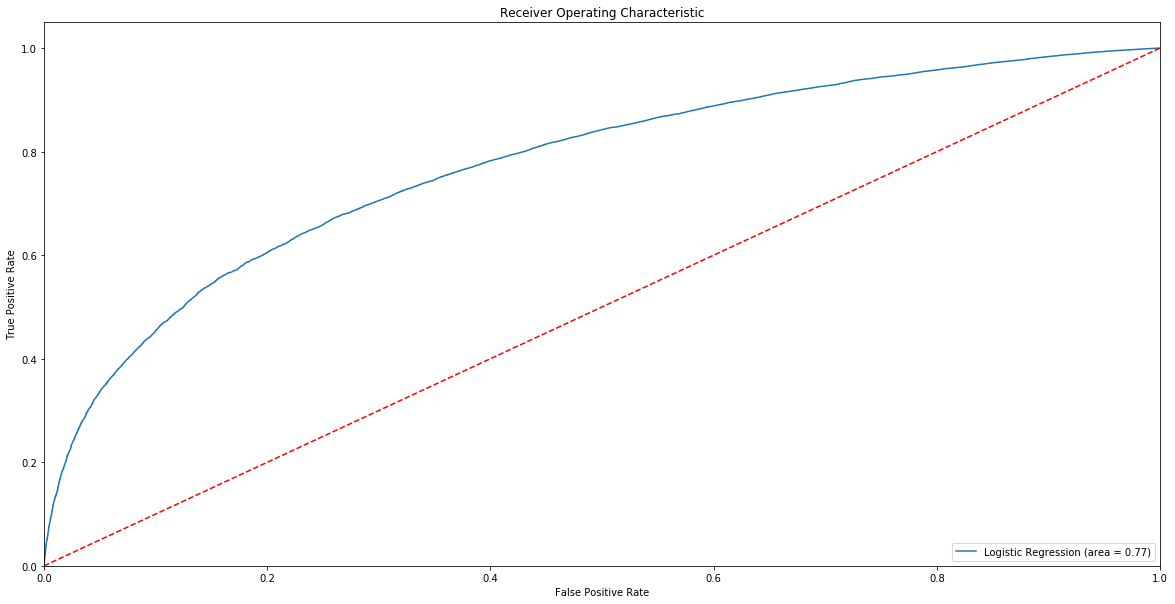

AUC: 0.774


In [28]:
logit_roc_auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('AUC: %.3f' % logit_roc_auc)

### The ROC curve for this model looks pretty good